# Self Attention 

### Import necessary libraries

In [1]:
import numpy as np
import seaborn as sns

### Softmax Function

In [2]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

### Self Attention Function

In [3]:
def self_attention(X, W_Q, W_K, W_V):
    # Derive query, key, and value vectors by applying linear transformations 
    q = X @ W_Q
    k = X @ W_K
    v = X @ W_V
    
    # Calculate attention scores by taking dot product of Query and Key
    dot_product = np.dot(q, k.T)
    
    # Get the scaling factor by taking the dimesion of key vector 
    scaling_factor = k.shape[0]
    
    # Find out the attention score and scale it down
    attention_score = (q @ k.T)/np.sqrt(scaling_factor)
    
    # Compute attention weights by applying softmax function
    attention_weight = softmax(attention_score)
    
    #Visualize the attention weights with the help of heatmap
    ax = sns.heatmap(attention_weight, linewidth= 0.5, cmap="Blues")
    
    # Compute final output vectors
    output_vector = attention_weight @ v
    
    # Return the output vector 
    return output_vector

### Arbitary values for our example - 'How are you'

In [4]:
X = np.array([
    [0.8, -1.8, 0.6, -0.5],
    [-1.6, 1.3, 1.9, 0.4],
    [-0.3, 0.7, -1.4, -0.9]
])

### Assign query, key, and value vectors

In [46]:
# Define the weight matrices for query, key, and value 
embedding_dimension = 4
dimension_key = 3
dimension_value = 3

# Set the random seed 
np.random.seed(11)

# Generate the weight matrices for query, key, and value using random values
W_Q = np.random.randn(embedding_dimension, dimension_key)
W_K = np.random.randn(embedding_dimension, dimension_key)
W_V = np.random.randn(embedding_dimension, dimension_value)


### Calculate the Output vector and a heatmap of attention softmaxed scores

Output:
 [[ 1.72830893  0.04298404  1.47559771]
 [-2.383999   -1.23785682 -2.24527617]
 [-0.45571222 -0.07401469 -0.69042453]]


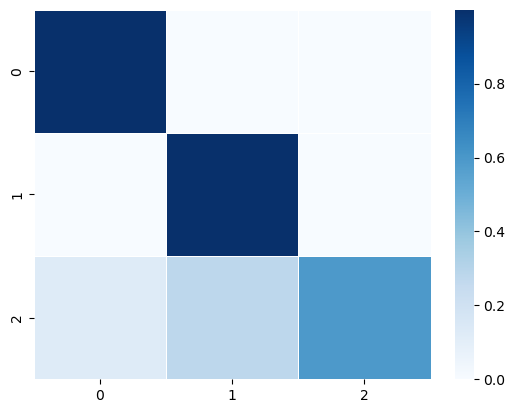

In [47]:
output_vector = self_attention(X, W_Q, W_K, W_V)
print("Output:\n", output_vector)